<a href="https://colab.research.google.com/github/Ovizero01/Machine-Leaning/blob/main/017_K%20Nearest%20Neighbour/017_Practice_on_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 17 Practice Notebook: K-Nearest Neighbour (KNN)

**Dataset:** Breast Cancer Wisconsin (Diagnostic)  
**Type:** Binary classification, fully tabular, numeric features only

### What you will practice
- Proper KNN training and prediction workflow
- Using pipelines with feature scaling
- Model evaluation using classification metrics
- Choosing the value of K
- Comparing distance metrics and voting weights

✅ This is a **practice notebook**: fill in the TODOs


## 0) Setup

Run this cell first.


In [40]:
#Importing Necessary Libraries [Done for you]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(42)


## 1) Load the Dataset (Tabular)

Breast Cancer dataset:
- 30 numeric features
- Binary target: malignant vs benign
- Very common in real ML pipelines

### Task
Load the dataset and inspect:
- Shape of X
- Target labels


In [41]:
# TODO 1: Load the dataset
# Hint: data = load_breast_cancer()


# TODO 2: Set X and y
# Hint: X = data.data, y = data.target


# TODO 3: Print:
# - X shape
# - unique class labels
# - class names

# YOUR CODE HERE
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape)
print(np.unique(y))
print("Class Names:", data.target_names)

(569, 30)
[0 1]
Class Names: ['malignant' 'benign']


## 2) Convert to DataFrame (Optional but Recommended)

Working with DataFrames helps interpretation and debugging.


In [42]:
# TODO: Convert X to a pandas DataFrame with feature names
# Hint: pd.DataFrame(X, columns=data.feature_names)

# YOUR CODE HERE
df = pd.DataFrame(X, columns=data.feature_names)

## 3) Train-Test Split

### Task
Split the dataset:
- test_size = 0.25
- random_state = 42
- stratify = y


In [43]:
# TODO: Create X_train, X_test, y_train, y_test using train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

## 4) Baseline KNN Model (With Scaling)

KNN relies on distance, so scaling is mandatory.

### Task
- Build a pipeline: StandardScaler → KNN
- Start with K = 5
- Fit the model
- Predict on test data
- Compute accuracy


In [44]:
# TODO: Create pipeline model
# Hint:
# model = Pipeline([
#   ("scaler", StandardScaler()),
#   ("knn", KNeighborsClassifier(n_neighbors=5))
# ])

# TODO: Fit model
# TODO: Predict on X_test
# TODO: Print accuracy

# YOUR CODE HERE
model = Pipeline([
   ("scaler", StandardScaler()),
  ("knn", KNeighborsClassifier(n_neighbors=5))
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", float(accuracy_score(y_test, y_pred)))

Accuracy: 0.9790209790209791


## 5) Model Evaluation

### Task
Evaluate your model using:
- Confusion matrix
- Classification report

Think:
- Which class is harder to predict?
- Is false negative more dangerous here?


In [45]:
# TODO: Compute confusion matrix
# TODO: Print classification report

# Hints:
# confusion_matrix(y_test, y_pred)
# classification_report(y_test, y_pred)

# YOUR CODE HERE
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[50  3]
 [ 0 90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.97      1.00      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



## 6) Optimization: Choosing the Best K

### Task
Try K values from 1 to 30.

Steps:
1. Loop over K
2. Train a pipeline for each K
3. Store accuracy
4. Plot accuracy vs K
5. Print best K and accuracy


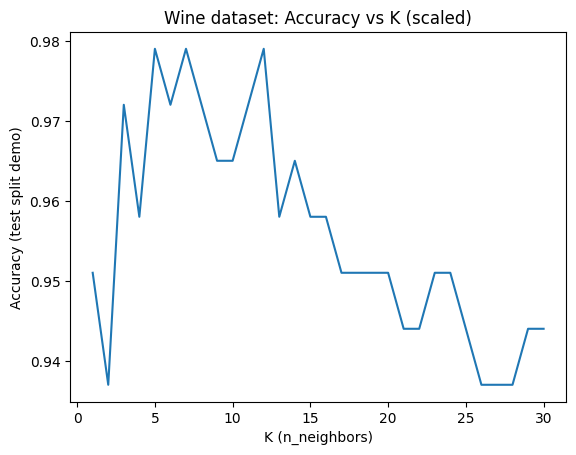


Best K (by this demo): 5
Best accuracy: 0.9790209790209791


In [46]:
# TODO: Sweep K values and store accuracy
# Hints:
# k_values = range(1, 31)
# accs = []
# for k in k_values:
#     model_k = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
#     model_k.fit(X_train, y_train)
#     pred_k = model_k.predict(X_test)
#     accs.append(accuracy_score(y_test, pred_k))

# TODO: Plot accuracy vs K
# TODO: Print best K and best accuracy

# YOUR CODE HERE
k_values = range(1, 31)
accs = []
for k in k_values:
    model_k = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
    model_k.fit(X_train, y_train)
    pred_k = model_k.predict(X_test)
    accs.append(accuracy_score(y_test, pred_k))

plt.figure()
plt.plot(list(k_values), accs)
plt.xlabel("K (n_neighbors)")
plt.ylabel("Accuracy (test split demo)")
plt.title("Wine dataset: Accuracy vs K (scaled)")
plt.show()

best_k = list(k_values)[int(np.argmax(accs))]
print("\nBest K (by this demo):", best_k)
print("Best accuracy:", float(np.max(accs)))

## 7) Try Different Distance Metrics and Weights

### Task
Using your best K:
Compare the following settings:
1. Euclidean distance (p=2), uniform weights
2. Manhattan distance (p=1), uniform weights
3. Euclidean distance (p=2), distance weights

Store results in a DataFrame.


In [47]:
# TODO: Compare different KNN settings
# Hints:
# settings = [
#   ("Euclidean uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="uniform")),
#   ("Manhattan uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=1, weights="uniform")),
#   ("Euclidean distance-weighted", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="distance"))
# ]

# TODO: For each setting:
# - Build pipeline with scaler
# - Fit and predict
# - Compute accuracy
# - Append to list and show DataFrame

# YOUR CODE HERE
settings = [
  ("Euclidean uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="uniform")),
  ("Manhattan uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=1, weights="uniform")),
  ("Euclidean distance-weighted", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="distance"))
]

rows = []
for name,knn in settings:
  model = Pipeline([("scaler", StandardScaler()), ("knn",knn)])
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  rows.append([name, accuracy_score(y_test,pred)])

pd.DataFrame(rows, columns=["Setting", "Accuracy"]).sort_values("Accuracy", ascending=False)

,Setting,Accuracy
0,Euclidean uniform,0.979021
2,Euclidean distance-weighted,0.979021
1,Manhattan uniform,0.965035


## 8) Scaling Reality Check (Critical Lesson)

### Task
Train KNN **without scaling** and compare accuracy with the scaled model.

This usually exposes why KNN without scaling is unreliable.


In [48]:
# TODO: Train KNN without scaling
# Hint:
# knn_raw = KNeighborsClassifier(n_neighbors=best_k)
# knn_raw.fit(X_train, y_train)
# pred_raw = knn_raw.predict(X_test)
# acc_raw = accuracy_score(y_test, pred_raw)

# TODO: Compare with scaled accuracy

# YOUR CODE HERE
knn_no_scale = KNeighborsClassifier(n_neighbors=best_k)
knn_no_scale.fit(X_train, y_train)
pred_no_scale = knn_no_scale.predict(X_test)
acc_no_scale = accuracy_score(y_test, pred_no_scale)
print("Accuracy without scaling:", acc_no_scale)

pred_scaled = model.predict(X_test)
acc_scaled = accuracy_score(y_test, pred_scaled)
print("Accuracy with scaling:", acc_scaled)

Accuracy without scaling: 0.9300699300699301
Accuracy with scaling: 0.9790209790209791


## 9) Reflection Questions

Write short answers.

1. Which K worked best and why?
2. Did distance-weighted voting help?
3. How much did scaling change the result?
4. Would you trust KNN for medical diagnosis? Why or why not?


**Your answers here:**

1. K = 5 or 7 worked best because they avoid over smoothing. The Dataset likely has well-separated classes
2. Distance-weighted voting didn't help because euclidean uniform and distance weighted gives same accuracy.
3. Accuracy with scaling has changed upto 4%.
4. No because it should not be trusted as a standalone model due to its sensitivity to noise, scaling issues, and lack of robustness.
